In [89]:
import cv2
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from skimage import img_as_ubyte
import numpy as np
from skimage.util import img_as_ubyte
from skimage.color import rgb2gray
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage.future import graph
from sklearn.cluster import KMeans

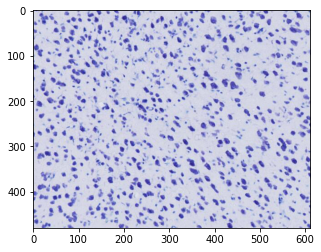

In [95]:
res = requests.get("http://braincircuits.org/cgi-bin/iipsrv.fcgi?FIF=/PMD2057/PMD2057%262056-N8-2015.03.12-02.52.40_PMD2057_3_0024.jp2&GAM=1&WID=612.0&RGN=0.5445833333333333,0.4564166666666667,0.0255,0.02&MINMAX=1:10,255&MINMAX=3:10,255&MINMAX=2:10,255&CVT=jpeg")
slice_1 = Image.open(BytesIO(res.content))
slice_1 = np.array(slice_1)
plt.imshow(slice_1,cmap = "gray")

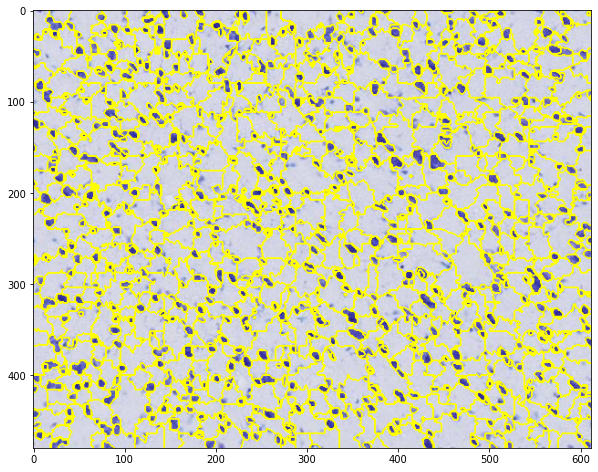

In [96]:
segments_quick = quickshift(slice_1, kernel_size=3, max_dist=6, ratio=0.5)
plt.figure(figsize = (10,10))
plt.imshow(mark_boundaries(slice_1, segments_quick))

In [101]:
def Cluster(segment_label,img,f = 0):
    k_means = KMeans(n_clusters=2)
    means = {}
    labels = np.unique(segment_label)
    #print(labels)
    for l in labels:
        x,y = np.where(segment_label == l)
        #print(x,y,"\n\n\n")
        intensity = []
        mean = 0
        for i in range(len(x)):
            intensity.append(img[x[i],y[i],:])
        mean = np.array(intensity).mean(axis = 0)
        means[l] = mean
    #print(len(means)) 
    cluster = k_means.fit(list(means.values())).labels_
    array = np.zeros_like(segment_label)
    for i in range(segment_label.shape[0]):
        for j in range(segment_label.shape[1]):
            if cluster[segment_label[i,j] - f] == 0:
                array[i,j] = 1
    plt.figure(figsize = (20,10))
    plt.subplot(1,2,1)
    plt.imshow(array,cmap = "gray")
    plt.subplot(1,2,2)
    plt.imshow(img) 
    return array   

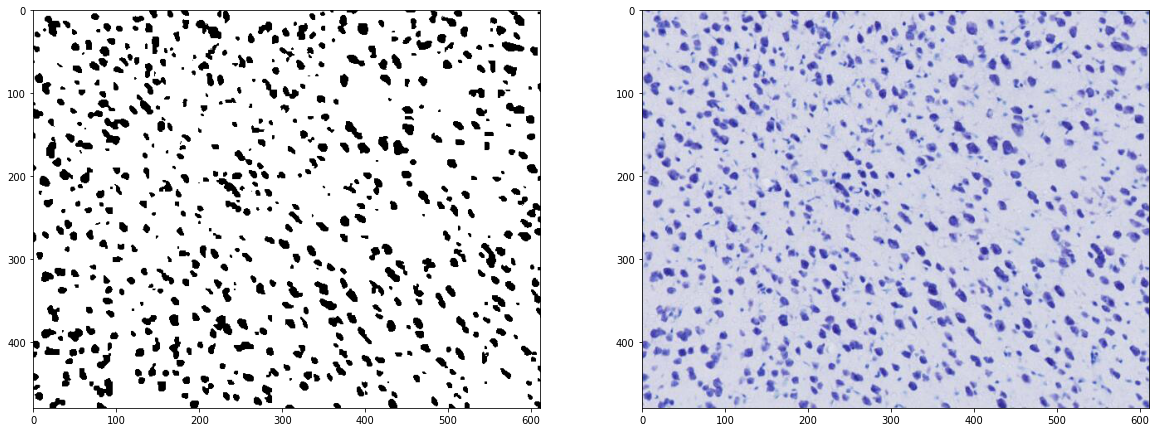

In [103]:
sl_1 = Cluster(segments_quick,slice_1)

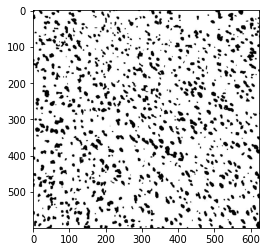

In [74]:
res1 = requests.get("https://raw.githubusercontent.com/Sai-Adarsh/htic/master/data/slice2gray.jpg")
slice_2 = Image.open(BytesIO(res1.content))
slice_2 = np.array(slice_2)
plt.imshow(slice_2,cmap = "gray")

In [117]:
#segments_quick2 = quickshift(slice_2, kernel_size=3, max_dist=6, ratio=0.5)
#plt.figure(figsize = (10,10))
#plt.imshow(mark_boundaries(slice_2, segments_quick2))

In [113]:
def get_contour(array):
    cv_image = img_as_ubyte(array)
    Points = list()
    edges  = cv2.threshold(cv_image, 0, 255, cv2.THRESH_BINARY)[1]
    contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for c in contours:
      M = cv2.moments(c)
      if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
      else:
        cX, cY = 0, 0
      Points.append([cX, cY])  
      cv2.circle(cv_image, (cX, cY), 1, (255, 255, 255), -1)
     # cv2.putText(cv_image, "centroid", (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    #plt.imshow(cv_image,cmap = "gray")
    plt.figure(figsize=(20,10))
    plt.imshow(cv_image,cmap = "gray")
    return Points,cv_image

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:503: UserWarning: Downcasting int64 to uint8 without scaling because max value 1 fits in uint8
  return convert(image, np.uint8, force_copy)


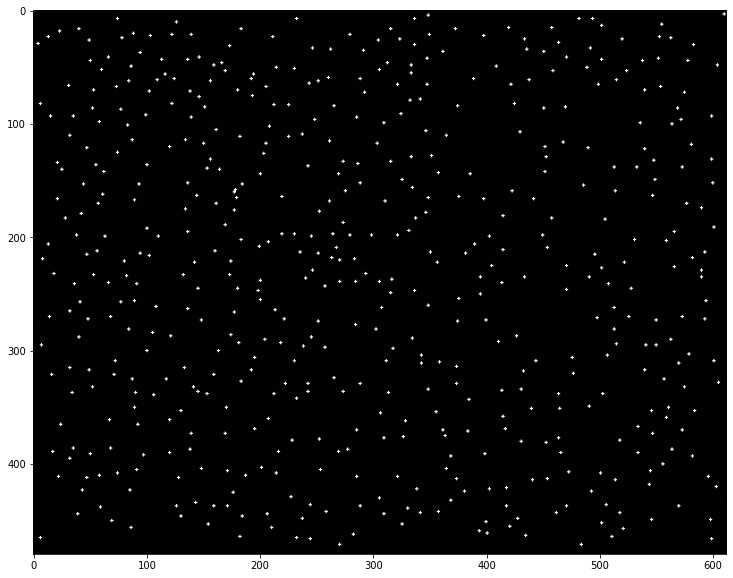

In [115]:
#type(sl_1)
points,sl_point = get_contour(sl_1)
#print(points)